# Preface

## **Title**  
*Prognostic Value of Baseline and Pre-Lymphodepletion PET/CT Imaging in DLBCL Patients Undergoing CAR T-Cell Therapy*

***

## Motivation

Chimeric Antigen Receptor (CAR) T-cell therapy has emerged as a transformative treatment modality for hematologic malignancies, demonstrating remarkable efficacy in diffuse large B-cell lymphoma (DLBCL) [1], [2], [3], [4], [5]. However, bridging therapy is frequently required to control disease burden during the manufacturing period before CAR T-cell infusion [1], [6], [7], [8], [9]. One way to measure the efficacy of bridging therapy on CAR T-cell therapy is through 18F-Fluorodeoxyglucose Positron Emission Tomography/Computerized Tomography (18F-FDG PET/CT) imaging. Current literature predominantly focuses on measuring conventional PET metrics such as metabolic active tumor volume (MATV) and standardized uptake value (SUVmax) at single timepoints, rather than employing comprehensive radiomic analysis of dynamic changes [10], [11], [12] . The prognostic value of high-dimensional radiomic features and their temporal evolution (delta radiomics) between baseline and pre-lymphodepletion chemotherapy (pre-LD) scans remains largely unexplored in the CAR T-cell therapy context [11].

***

## Strategic goals

We aim to assess whether baseline, pre-LD or delta radiomic profiles (extracted during the bridging period) provide superior prognostic value compared to conventional clinical variables for predicting treatment response, toxicity, progression-free survival, and overall survival.

***

## Starting point

Current literature predominantly focuses on conventional PET metrics such as metabolic active tumor volume (MATV) and standardized uptake value (SUVmax) at single timepoints, rather than employing comprehensive radiomic analysis of dynamic changes [13]. Preliminary evidence suggests reduced MATV prior to infusion correlates with improved OS (Overall Survival) and TTP (Time To Progression) [12], [14]. Few studies have systematically assessed delta radiomic features, and almost none have explored high-dimensional changes in a CAR T-cell cohort [13], [15]. Bridging strategies (systemic therapy, radiotherapy, or combinations) may influence imaging dynamics, but their detailed prognostic impact remains unclear [16], [17]. 

***

## Expected results (Hypothesis)

We hypothesize that comprehensive delta radiomic analysis will demonstrate enhanced predictive capability compared to conventional single-timepoint metrics.

***

## Delta radiomics computation

In [1]:
import pandas as pd
import numpy as np
import os
import yaml

## Load config and preview delta radiomics

In [2]:
from config import load_paths
from data_io import calculate_delta_radiomics

data_folder_path, clinical_path = load_paths("config.yaml")
delta_radiomics_results, a_radiomics, b_radiomics = calculate_delta_radiomics(data_folder_path)

# quick sanity check: print a small summary for each patient
print("\n--- Final Results Summary ---")
for patient, row in delta_radiomics_results.iterrows():  # iterrows lets us loop over patients row by row [web:41][web:48]
    non_na = row.dropna()  # dropna is the standard way to remove missing values in pandas [web:43][web:51]
    print(f"\n{patient} Delta Radiomics ({len(non_na)} features):")
    print(non_na.head().to_dict())  # to_dict() is handy to print a compact dict view of the features [web:39][web:50]


--- Final Results Summary ---

005 Delta Radiomics (99 features):
{'MeshVolume (cc)': 179.67883295273202, 'Volume (cc)': 202.66197993488015, 'Compactness1': 0.00026419694638516594, 'Compactness2': 0.0011207195594394193, 'Elongation': -0.1545679922778861}

006 Delta Radiomics (99 features):
{'MeshVolume (cc)': -203.4869283140039, 'Volume (cc)': -206.51456705054008, 'Compactness1': 0.0049186524205644955, 'Compactness2': 0.04152134393043002, 'Elongation': 0.0026342578533538885}

007 Delta Radiomics (99 features):
{'MeshVolume (cc)': -338.85647581890817, 'Volume (cc)': -53.55853945689978, 'Compactness1': -0.0005066325001649376, 'Compactness2': -0.00037047047977063535, 'Elongation': 0.07142509494624966}

008 Delta Radiomics (43 features):
{'MeshVolume (cc)': -132.1755600000381, 'Volume (cc)': -134.14301999999998, 'Compactness1': 0.0032464802683465216, 'Compactness2': 0.029861253969805775, 'Elongation': -0.0827368925135829}

009 Delta Radiomics (99 features):
{'MeshVolume (cc)': 134.0364173

In [3]:
delta_radiomics_results

,MeshVolume (cc),Volume (cc),Compactness1,Compactness2,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,...,glrlm_RunVariance,glrlm_ShortRunEmphasis,glrlm_ShortRunHighGrayLevelEmphasis,glrlm_ShortRunLowGrayLevelEmphasis,TLG,Number of lesions,Dmax Patient (mm),Spread Patient (mm),Dmax Bulk (mm),Spread Bulk (mm)
005,179.678833,202.661980,0.000264,0.001121,-0.154568,-0.179412,2.448599,306.989805,-151.000382,230.851363,...,1.119328,-0.098716,-0.101934,-0.097912,1122.099512,13.0,184.614198,10352.503667,160.976470,5849.759928
006,-203.486928,-206.514567,0.004919,0.041521,0.002634,0.002381,0.127861,-11.301956,303.648427,176.881094,...,1.416009,0.032562,0.032562,0.032562,-1902.683739,1.0,547.166080,7671.662980,354.932145,1722.075793
007,-338.856476,-53.558539,-0.000507,-0.000370,0.071425,0.016399,20.010696,30.697467,-81.079674,-33.358760,...,-5.936345,0.076732,0.083133,0.075460,227.653881,3.0,123.012344,2255.654095,130.451805,983.137861
008,-132.175560,-134.143020,0.003246,0.029861,-0.082737,0.030653,3.284378,-55.262061,153.100326,473.795599,...,NaN,NaN,NaN,NaN,-1383.518197,0.0,396.153536,1392.367241,17.553961,-558.529696
009,134.036417,135.082881,-0.003934,-0.035294,0.278651,0.110604,78.870652,25.173805,285.955105,125.184095,...,-1.293857,0.008390,-0.004554,0.012367,623.006859,4.0,553.035805,4706.208333,26.947836,535.824989
010,-1740.405214,-1709.315684,0.000275,0.001942,0.041219,0.041415,-18.618091,-173.882011,-362.968918,-421.962460,...,-19.182550,-0.058513,-0.058513,-0.058513,-12856.820854,2.0,-74.319871,536.337880,-251.560087,181.872939
011,-403.431250,-411.208054,-0.008448,-0.057458,0.184636,0.143643,41.239910,-25.143300,-29.935314,-174.406684,...,-47.635928,0.125760,0.254256,0.103773,-1665.931074,20.0,76.004485,9073.532138,-218.245188,4925.288459
013,282.473562,285.526503,-0.015736,-0.255738,0.442808,-0.060073,26.527685,124.898852,64.273602,104.376945,...,-1.636574,-0.009532,-0.101302,0.013411,901.939401,7.0,340.650929,3034.678995,165.954339,1933.434785
014,-618.581947,-619.532100,-0.001067,-0.007992,0.153009,-0.070289,-34.663123,144.560198,68.070835,63.707567,...,NaN,NaN,NaN,NaN,-865.378541,3.0,53.796518,1726.580754,-80.063723,854.025032
015,49.867963,49.214353,0.016168,0.256642,0.266914,0.405557,-0.581837,-299.663486,-166.887134,-267.583392,...,NaN,NaN,NaN,NaN,321.512895,-3.0,-530.927813,-1122.497606,-530.927813,-1122.497606


In [4]:
delta_radiomics_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 005 to 095
Data columns (total 99 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   MeshVolume (cc)                         31 non-null     float64
 1   Volume (cc)                             31 non-null     float64
 2   Compactness1                            31 non-null     float64
 3   Compactness2                            31 non-null     float64
 4   Elongation                              31 non-null     float64
 5   Flatness                                31 non-null     float64
 6   LeastAxisLength                         31 non-null     float64
 7   MajorAxisLength                         31 non-null     float64
 8   Maximum2DDiameterColumn                 31 non-null     float64
 9   Maximum2DDiameterRow                    31 non-null     float64
 10  Maximum2DDiameterSlice                  31 non-null     float64
 1

In [5]:
# clean up the three radiomics DataFrames (delta, A, B)
# idea: some radiomic features are super sparse (NaNs almost everywhere),
# so we only keep columns that are fully filled for all patients
# after that, we reset the index and turn it into an 'id' column

for df in [delta_radiomics_results, a_radiomics, b_radiomics]:
    df.dropna(axis=1, how='any', inplace=True)  # classic pandas dropna on columns 
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'id'}, inplace=True)
    df['id'] = df['id'].astype(int)  # simple cast; if this ever crashes we know IDs are not purely numeric


In [6]:
delta_radiomics_results.head()

,id,MeshVolume (cc),Volume (cc),Compactness1,Compactness2,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,...,SUV_StandardDeviation,SUV_TotalEnergy,SUV_Uniformity,SUV_Variance,TLG,Number of lesions,Dmax Patient (mm),Spread Patient (mm),Dmax Bulk (mm),Spread Bulk (mm)
0,5,179.678833,202.661980,0.000264,0.001121,-0.154568,-0.179412,2.448599,306.989805,-151.000382,...,-0.136024,9.628297e+06,-0.000075,-1.258279,1122.099512,13.0,184.614198,10352.503667,160.976470,5849.759928
1,6,-203.486928,-206.514567,0.004919,0.041521,0.002634,0.002381,0.127861,-11.301956,303.648427,...,-2.225843,-1.765532e+07,0.000000,-11.122401,-1902.683739,1.0,547.166080,7671.662980,354.932145,1722.075793
2,7,-338.856476,-53.558539,-0.000507,-0.000370,0.071425,0.016399,20.010696,30.697467,-81.079674,...,0.715720,1.156602e+07,-0.002118,4.147491,227.653881,3.0,123.012344,2255.654095,130.451805,983.137861
3,8,-132.175560,-134.143020,0.003246,0.029861,-0.082737,0.030653,3.284378,-55.262061,153.100326,...,-0.761688,-9.982383e+06,0.000000,-2.283614,-1383.518197,0.0,396.153536,1392.367241,17.553961,-558.529696
4,9,134.036417,135.082881,-0.003934,-0.035294,0.278651,0.110604,78.870652,25.173805,285.955105,...,2.374860,1.900570e+07,-0.064326,30.530366,623.006859,4.0,553.035805,4706.208333,26.947836,535.824989


In the raw radiomics tables we initially had 99 features per patient, but many of these features contained missing values for a substantial fraction of the 31 patients. To avoid unstable models and complex imputation on such a small cohort, only features that are fully observed for all patients are kept. Concretely, any feature column that contains at least one missing value is dropped, so the final radiomics matrices retain only those features with complete data across all patients. This results in a reduced but cleaner feature set (44 robust features instead of the original 99), which is easier to interpret and more reliable for downstream modeling in a small-sample setting.

In [7]:
# to differentiate the columns of A and B datasets
a_radiomics = a_radiomics.add_suffix('_a')

In [8]:
a_radiomics.head()

,id_a,MeshVolume (cc)_a,Volume (cc)_a,Compactness1_a,Compactness2_a,Elongation_a,Flatness_a,LeastAxisLength_a,MajorAxisLength_a,Maximum2DDiameterColumn_a,...,SUV_StandardDeviation_a,SUV_TotalEnergy_a,SUV_Uniformity_a,SUV_Variance_a,TLG_a,Number of lesions_a,Dmax Patient (mm)_a,Spread Patient (mm)_a,Dmax Bulk (mm)_a,Spread Bulk (mm)_a
0,5,410.103787,398.813580,0.005837,0.012107,0.558487,0.355846,102.570709,288.244831,604.608311,...,4.693224,2.838198e+07,0.995641,22.026354,2795.671489,22.0,1012.265388,12143.739993,634.643836,5391.583970
1,6,382.203626,388.922067,0.009420,0.031529,0.222277,0.119058,75.010564,630.035602,534.767317,...,3.611391,1.899080e+07,1.000000,13.042143,2326.624355,19.0,826.848496,9064.189020,581.042584,6016.069298
2,7,2318.279862,2316.219528,0.001282,0.000584,0.286171,0.198725,162.471469,817.568425,864.561388,...,2.539564,4.722033e+07,0.998794,6.449383,8647.110928,8.0,968.496772,4669.493537,496.134002,2114.161419
3,8,657.198795,662.416920,0.011321,0.045535,0.573857,0.188817,94.938713,502.808344,657.007222,...,1.879892,1.491912e+07,1.000000,3.533992,2886.516585,6.0,919.512055,2912.601228,919.512055,2682.518960
4,9,280.358030,284.356359,0.014593,0.075666,0.134513,0.093095,62.068863,666.725172,495.125230,...,5.240395,2.040936e+07,0.969021,27.461740,1892.885103,8.0,764.874890,3262.263546,753.472897,2944.758813


In [9]:
b_radiomics = b_radiomics.add_suffix('_b')

In [10]:
b_radiomics.head()

,id_b,MeshVolume (cc)_b,Volume (cc)_b,Compactness1_b,Compactness2_b,Elongation_b,Flatness_b,LeastAxisLength_b,MajorAxisLength_b,Maximum2DDiameterColumn_b,...,SUV_StandardDeviation_b,SUV_TotalEnergy_b,SUV_Uniformity_b,SUV_Variance_b,TLG_b,Number of lesions_b,Dmax Patient (mm)_b,Spread Patient (mm)_b,Dmax Bulk (mm)_b,Spread Bulk (mm)_b
0,5,589.782620,601.475560,0.006102,0.013228,0.403919,0.176433,105.019308,595.234636,453.607929,...,4.557200,3.801028e+07,0.995566,20.768074,3917.771002,35.0,1196.879586,22496.243660,795.620306,11241.343898
1,6,178.716698,182.407500,0.014339,0.073050,0.224911,0.121439,75.138425,618.733646,838.415744,...,1.385548,1.335473e+06,1.000000,1.919742,423.940616,20.0,1374.014576,16735.852000,935.974729,7738.145091
2,7,1979.423386,2262.660989,0.000776,0.000214,0.357596,0.215124,182.482165,848.265892,783.481714,...,3.255284,5.878635e+07,0.996676,10.596874,8874.764809,11.0,1091.509116,6925.147632,626.585808,3097.299280
3,8,525.023235,528.273900,0.014567,0.075396,0.491120,0.219470,98.223091,447.546283,810.107548,...,1.118203,4.936741e+06,1.000000,1.250378,1502.998388,6.0,1315.665591,4304.968469,937.066016,2123.989264
4,9,414.394448,419.439240,0.010660,0.040372,0.413164,0.203700,140.939516,691.898977,781.080335,...,7.615255,3.941506e+07,0.904695,57.992107,2515.891962,12.0,1317.910694,7968.471879,780.420733,3480.583802


In [11]:
for patient, delta_data in delta_radiomics_results.items():
    if len(delta_data) == 99:
        print(patient)
filtered_results = {patient: data for patient, data in delta_radiomics_results.items() if len(data) != 99}        
len(filtered_results)

44

# Load Clinical Data

In [12]:
from config import load_paths
import pandas as pd

data_folder_path, clinical_path = load_paths("config.yaml")

clinic_data = pd.read_excel(clinical_path)

In [13]:
clinic_data

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_spec_2___ne.factor,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin
0,Record ID,Comments,Date 1st tumorboard meeting,Sex,NaN,Age,Height,Weight,BMI (kg/m2),Diagnosis for which there is now a cellular th...,...,NaN,Please specify all subsequent anti-cancer ther...,Date lab results,Hemoglobin in mmol/L,Thrombocytes in 10E9/L,Leukocytes in 10E9/L,Neutrophils in 10E9/L (automated differentiation),LDH in U/L,CRP in mg/L,Ferritin in µg/l
1,FTC-UMCG-0001,splenectomy 2012: total hip links 2015: jich...,2020-05-04,0,Male,68,180,72.6,22,1,...,Unchecked,NaN,2020-04-28,7.1,90,6.3,4.74,169,26,NE
2,FTC-UMCG-0002,> 20 jaar geleden DVT links Longembolie links...,2020-05-07,0,Male,73,190,86,24,2,...,Unchecked,NaN,2020-05-14,"6,4",172,4.3,2.83,NE,47,2847
3,FTC-UMCG-0003,"2019 Nov Grootcellig B-Non-Hodgkin lymfoom,...",2020-05-18,0,Male,59,181,91,28,1,...,Unchecked,Radiotherapy CNS and Korfel 3x response evalua...,2020-05-15,7.4,389,11.9,NE,214,14,1404
4,FTC-UMCG-0004,2015 gehoorverlies 2019 aug: DLBCL ...,2020-05-14,1,Female,61,169,73,26,1,...,Unchecked,NaN,2020-04-21,6.5,159,9.2,6.55,296,3.0,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,FTC-UMCG-0088,Hematologische voorgeschiedenis 2013 bi-cy...,2023-09-28,0,Male,54,178,69.8,22,1,...,Unchecked,NaN,2023-09-29,9.1,93,7.0,NE,369,7,1643
65,FTC-UMCG-0089,2013 dec: laaggradig B-NHL stadium IV met s...,2023-10-05,1,Female,70,160,58.7,23,2,...,Unchecked,Epcoritamab monotherapy - 48 mg per injection ...,2023-10-04,8.1,205,5.3,2.97,325,17,204
66,FTC-UMCG-0090,Relevante voorgeschiedenis: 2016 Stadium IV D...,2023-10-12,0,Male,70,170,73,25,1,...,Unchecked,2024-02 recidief diffuus grootcellig B-cel lym...,2023-10-12,9.5,327,6.6,5.06,991,78,669
67,FTC-UMCG-0096,Voorgeschiedenis: Tonsilectomie 2004 IBS ...,2022-11-22,0,Male,62,180,78,24,1,...,Unchecked,NaN,2022-10-11,6.8,109,20.7,NE,475,15,1932


In [14]:
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Columns: 275 entries, record_id to cli_st_ferritin
dtypes: float64(1), object(274)
memory usage: 148.4+ KB


The `record_id` column stores the unique identifier for each patient, and the long free‑text column contains the physician’s diagnostic and medical history notes. This cell is only used to inspect and understand the structure and content of the clinical file before filtering it down to the 31 patients included in the radiomics analysis.

In [15]:
clinic_data['record_id'].values

array(['Record ID', 'FTC-UMCG-0001', 'FTC-UMCG-0002', 'FTC-UMCG-0003',
       'FTC-UMCG-0004', 'FTC-UMCG-0005', 'FTC-UMCG-0006', 'FTC-UMCG-0007',
       'FTC-UMCG-0008', 'FTC-UMCG-0009', 'FTC-UMCG-0010', 'FTC-UMCG-0011',
       'FTC-UMCG-0012', 'FTC-UMCG-0013', 'FTC-UMCG-0014', 'FTC-UMCG-0015',
       'FTC-UMCG-0016', 'FTC-UMCG-0017', 'FTC-UMCG-0018', 'FTC-UMCG-0019',
       'FTC-UMCG-0020', 'FTC-UMCG-0021', 'FTC-UMCG-0022', 'FTC-UMCG-0023',
       'FTC-UMCG-0024', 'FTC-UMCG-0025', 'FTC-UMCG-0026', 'FTC-UMCG-0027',
       'FTC-UMCG-0028', 'FTC-UMCG-0029', 'FTC-UMCG-0030', 'FTC-UMCG-0031',
       'FTC-UMCG-0046', 'FTC-UMCG-0047', 'FTC-UMCG-0048', 'FTC-UMCG-0049',
       'FTC-UMCG-0050', 'FTC-UMCG-0051', 'FTC-UMCG-0052', 'FTC-UMCG-0053',
       'FTC-UMCG-0054', 'FTC-UMCG-0055', 'FTC-UMCG-0060', 'FTC-UMCG-0061',
       'FTC-UMCG-0064', 'FTC-UMCG-0065', 'FTC-UMCG-0066', 'FTC-UMCG-0067',
       'FTC-UMCG-0068', 'FTC-UMCG-0069', 'FTC-UMCG-0070', 'FTC-UMCG-0075',
       'FTC-UMCG-0076', 'FTC-

In [16]:
# to keep only 3 digits for each patient
clinic_data['id_cleaned'] = [value[-3:] for value in clinic_data['record_id'].values]

In [17]:
clinic_data

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned
0,Record ID,Comments,Date 1st tumorboard meeting,Sex,NaN,Age,Height,Weight,BMI (kg/m2),Diagnosis for which there is now a cellular th...,...,Please specify all subsequent anti-cancer ther...,Date lab results,Hemoglobin in mmol/L,Thrombocytes in 10E9/L,Leukocytes in 10E9/L,Neutrophils in 10E9/L (automated differentiation),LDH in U/L,CRP in mg/L,Ferritin in µg/l,ID
1,FTC-UMCG-0001,splenectomy 2012: total hip links 2015: jich...,2020-05-04,0,Male,68,180,72.6,22,1,...,NaN,2020-04-28,7.1,90,6.3,4.74,169,26,NE,001
2,FTC-UMCG-0002,> 20 jaar geleden DVT links Longembolie links...,2020-05-07,0,Male,73,190,86,24,2,...,NaN,2020-05-14,"6,4",172,4.3,2.83,NE,47,2847,002
3,FTC-UMCG-0003,"2019 Nov Grootcellig B-Non-Hodgkin lymfoom,...",2020-05-18,0,Male,59,181,91,28,1,...,Radiotherapy CNS and Korfel 3x response evalua...,2020-05-15,7.4,389,11.9,NE,214,14,1404,003
4,FTC-UMCG-0004,2015 gehoorverlies 2019 aug: DLBCL ...,2020-05-14,1,Female,61,169,73,26,1,...,NaN,2020-04-21,6.5,159,9.2,6.55,296,3.0,NE,004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,FTC-UMCG-0088,Hematologische voorgeschiedenis 2013 bi-cy...,2023-09-28,0,Male,54,178,69.8,22,1,...,NaN,2023-09-29,9.1,93,7.0,NE,369,7,1643,088
65,FTC-UMCG-0089,2013 dec: laaggradig B-NHL stadium IV met s...,2023-10-05,1,Female,70,160,58.7,23,2,...,Epcoritamab monotherapy - 48 mg per injection ...,2023-10-04,8.1,205,5.3,2.97,325,17,204,089
66,FTC-UMCG-0090,Relevante voorgeschiedenis: 2016 Stadium IV D...,2023-10-12,0,Male,70,170,73,25,1,...,2024-02 recidief diffuus grootcellig B-cel lym...,2023-10-12,9.5,327,6.6,5.06,991,78,669,090
67,FTC-UMCG-0096,Voorgeschiedenis: Tonsilectomie 2004 IBS ...,2022-11-22,0,Male,62,180,78,24,1,...,NaN,2022-10-11,6.8,109,20.7,NE,475,15,1932,096


In [18]:
clinic_data['id_cleaned'].values

array([' ID', '001', '002', '003', '004', '005', '006', '007', '008',
       '009', '010', '011', '012', '013', '014', '015', '016', '017',
       '018', '019', '020', '021', '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031', '046', '047', '048', '049',
       '050', '051', '052', '053', '054', '055', '060', '061', '064',
       '065', '066', '067', '068', '069', '070', '075', '076', '077',
       '078', '079', '080', '081', '082', '083', '084', '085', '086',
       '087', '088', '089', '090', '096', '104'], dtype=object)

In [19]:
delta_radiomics_results['id']

0      5
1      6
2      7
3      8
4      9
5     10
6     11
7     13
8     14
9     15
10    16
11    17
12    18
13    22
14    23
15    24
16    26
17    28
18    31
19    46
20    47
21    48
22    50
23    52
24    55
25    61
26    64
27    68
28    70
29    77
30    95
Name: id, dtype: int64

In [20]:
# remove the first row
patient_ids = clinic_data['id_cleaned'].values[1:].astype(int)

In [21]:
# find patients that are in both datasets
# values starts from 1 to skip the comment row
intercept = [id for id in delta_radiomics_results['id'] if id in patient_ids]

In [22]:
clinic_data['id_cleaned'] = ['ID'] + patient_ids.tolist()

In [23]:
clinic_data

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned
0,Record ID,Comments,Date 1st tumorboard meeting,Sex,NaN,Age,Height,Weight,BMI (kg/m2),Diagnosis for which there is now a cellular th...,...,Please specify all subsequent anti-cancer ther...,Date lab results,Hemoglobin in mmol/L,Thrombocytes in 10E9/L,Leukocytes in 10E9/L,Neutrophils in 10E9/L (automated differentiation),LDH in U/L,CRP in mg/L,Ferritin in µg/l,ID
1,FTC-UMCG-0001,splenectomy 2012: total hip links 2015: jich...,2020-05-04,0,Male,68,180,72.6,22,1,...,NaN,2020-04-28,7.1,90,6.3,4.74,169,26,NE,1
2,FTC-UMCG-0002,> 20 jaar geleden DVT links Longembolie links...,2020-05-07,0,Male,73,190,86,24,2,...,NaN,2020-05-14,"6,4",172,4.3,2.83,NE,47,2847,2
3,FTC-UMCG-0003,"2019 Nov Grootcellig B-Non-Hodgkin lymfoom,...",2020-05-18,0,Male,59,181,91,28,1,...,Radiotherapy CNS and Korfel 3x response evalua...,2020-05-15,7.4,389,11.9,NE,214,14,1404,3
4,FTC-UMCG-0004,2015 gehoorverlies 2019 aug: DLBCL ...,2020-05-14,1,Female,61,169,73,26,1,...,NaN,2020-04-21,6.5,159,9.2,6.55,296,3.0,NE,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,FTC-UMCG-0088,Hematologische voorgeschiedenis 2013 bi-cy...,2023-09-28,0,Male,54,178,69.8,22,1,...,NaN,2023-09-29,9.1,93,7.0,NE,369,7,1643,88
65,FTC-UMCG-0089,2013 dec: laaggradig B-NHL stadium IV met s...,2023-10-05,1,Female,70,160,58.7,23,2,...,Epcoritamab monotherapy - 48 mg per injection ...,2023-10-04,8.1,205,5.3,2.97,325,17,204,89
66,FTC-UMCG-0090,Relevante voorgeschiedenis: 2016 Stadium IV D...,2023-10-12,0,Male,70,170,73,25,1,...,2024-02 recidief diffuus grootcellig B-cel lym...,2023-10-12,9.5,327,6.6,5.06,991,78,669,90
67,FTC-UMCG-0096,Voorgeschiedenis: Tonsilectomie 2004 IBS ...,2022-11-22,0,Male,62,180,78,24,1,...,NaN,2022-10-11,6.8,109,20.7,NE,475,15,1932,96


In [24]:
clinic_data_cleaned = clinic_data[clinic_data['id_cleaned'].isin(intercept)]

In [25]:
clinic_data_cleaned

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned
5,FTC-UMCG-0005,2019 mei: hemicastratie links Hematologische...,1900-01-01,0,Male,62,173,58,19,1,...,NaN,2020-05-20,5.3,145,2.4,NaN,NE,0.3,894,5
6,FTC-UMCG-0006,2014 Diffuus Grootcellig B-cel lymfoom st I...,2020-07-02,1,Female,58,173,57,19,2,...,"Verdere behandeling, inclusief allo-SCT in UMCU",2020-07-13,7.6,6,5.7,NE,275,9,371,6
7,FTC-UMCG-0007,2020 (feb) Stadium IV high grade B-cel lymfoom...,2020-08-10,0,Male,58,182,99.2,30,5,...,NaN,2020-08-18,"6,4",295,"5,0",NE,885,47,2570,7
8,FTC-UMCG-0008,"2017 okt: Snel progressief DLBCL, stadium I...",2020-09-21,1,Female,72,169,60,21,1,...,Epcoritamab monotherapie,2020-09-18,5.7,321,1.9,NE,250,1.0,NE,8
9,FTC-UMCG-0009,2017 okt gastro- en colonoscopie ivm chroni...,2020-09-02,0,Male,48,186,106,31,2,...,NaN,2020-09-02,7.2,324,8.7,NE,283,10,54,9
10,FTC-UMCG-0010,2020 feb nefrostomiekatheter rechts ivm hyd...,2020-10-19,0,Male,54,181,69,21,1,...,NaN,2020-10-19,5.4,382,26.3,NE,417,206,4786,10
11,FTC-UMCG-0011,2020-03: koorts zonder lokaliserende klachten....,2020-10-15,0,Male,34,185,86.1,25,5,...,NaN,2020-10-19,6.8,442,5.3,3.87,992,17,485,11
13,FTC-UMCG-0013,Hematologische voorgeschiedenis: 2013 (mei) ...,2020-11-23,0,Male,46,187,97,28,2,...,NaN,2020-11-25,5.8,253,5.7,4.49,313,32,559,13
14,FTC-UMCG-0014,020 (mei) Diffuus grootcellig B-cel lymfoom st...,2020-12-17,0,Male,70,190,96,27,1,...,NaN,2020-12-15,6.8,497,6.2,NE,484,225,1535,14
15,FTC-UMCG-0015,ematologische voorgeschiedenis: 2005 (dec) s...,2021-01-07,1,Female,66,162,56,21,2,...,NaN,2021-01-08,6.4,432,7.6,6.10,235,8,569,15


In [26]:
clinic_data_cleaned.reset_index(drop=True, inplace=True)

In [27]:
clinic_data_cleaned.shape

(30, 276)

In the full clinical database, 31 patients are available, but only 30 of them have matching PET radiomics data and are therefore included in the modeling cohort. The final clinical table for these 30 patients contains 276 variables because it combines clinical information with radiomic features from both baseline (A) and pre-lymphodepletion (B) PET scans after merging the corresponding radiomics tables.

In [28]:
# we now should select features we need for modelling the baseline, without the delta radiomics
clinic_data_cleaned

,record_id,medhis_diag_comments,scr_date_tb1stmeeting,scr_sex,scr_sex.factor,scr_age,scr_height,scr_weight,scr_bmi,indication_dis_diagnosis,...,post_cart_ther_comment_spec,cli_st_lab_date,cli_st_hemoglobin,cli_st_trombocytes,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned
0,FTC-UMCG-0005,2019 mei: hemicastratie links Hematologische...,1900-01-01,0,Male,62,173,58,19,1,...,NaN,2020-05-20,5.3,145,2.4,NaN,NE,0.3,894,5
1,FTC-UMCG-0006,2014 Diffuus Grootcellig B-cel lymfoom st I...,2020-07-02,1,Female,58,173,57,19,2,...,"Verdere behandeling, inclusief allo-SCT in UMCU",2020-07-13,7.6,6,5.7,NE,275,9,371,6
2,FTC-UMCG-0007,2020 (feb) Stadium IV high grade B-cel lymfoom...,2020-08-10,0,Male,58,182,99.2,30,5,...,NaN,2020-08-18,"6,4",295,"5,0",NE,885,47,2570,7
3,FTC-UMCG-0008,"2017 okt: Snel progressief DLBCL, stadium I...",2020-09-21,1,Female,72,169,60,21,1,...,Epcoritamab monotherapie,2020-09-18,5.7,321,1.9,NE,250,1.0,NE,8
4,FTC-UMCG-0009,2017 okt gastro- en colonoscopie ivm chroni...,2020-09-02,0,Male,48,186,106,31,2,...,NaN,2020-09-02,7.2,324,8.7,NE,283,10,54,9
5,FTC-UMCG-0010,2020 feb nefrostomiekatheter rechts ivm hyd...,2020-10-19,0,Male,54,181,69,21,1,...,NaN,2020-10-19,5.4,382,26.3,NE,417,206,4786,10
6,FTC-UMCG-0011,2020-03: koorts zonder lokaliserende klachten....,2020-10-15,0,Male,34,185,86.1,25,5,...,NaN,2020-10-19,6.8,442,5.3,3.87,992,17,485,11
7,FTC-UMCG-0013,Hematologische voorgeschiedenis: 2013 (mei) ...,2020-11-23,0,Male,46,187,97,28,2,...,NaN,2020-11-25,5.8,253,5.7,4.49,313,32,559,13
8,FTC-UMCG-0014,020 (mei) Diffuus grootcellig B-cel lymfoom st...,2020-12-17,0,Male,70,190,96,27,1,...,NaN,2020-12-15,6.8,497,6.2,NE,484,225,1535,14
9,FTC-UMCG-0015,ematologische voorgeschiedenis: 2005 (dec) s...,2021-01-07,1,Female,66,162,56,21,2,...,NaN,2021-01-08,6.4,432,7.6,6.10,235,8,569,15


In [29]:
# after merging, we have to find the columns that filled by NaNs, so we have to drop them
clinic_data_cleaned.isna().sum().sum()

986

In [30]:
# dropping columns with all NaN values
clinic_data_cleaned = clinic_data_cleaned.dropna(axis=1, how='all')

In [31]:
clinic_data_cleaned.shape

(30, 266)

In [32]:
clinic_data_cleaned.columns

Index(['record_id', 'medhis_diag_comments', 'scr_date_tb1stmeeting', 'scr_sex',
       'scr_sex.factor', 'scr_age', 'scr_height', 'scr_weight', 'scr_bmi',
       'indication_dis_diagnosis',
       ...
       'post_cart_ther_comment_spec', 'cli_st_lab_date', 'cli_st_hemoglobin',
       'cli_st_trombocytes', 'cli_st_leukocytes', 'cli_st_neutrophils',
       'cli_st_ldh', 'cli_st_crp', 'cli_st_ferritin', 'id_cleaned'],
      dtype='object', length=266)

In [33]:
# we don't need factor columns for modelling as they are encoded already
factors = [factor for factor in clinic_data_cleaned.columns if 'factor' in factor]

In [34]:
factors

['scr_sex.factor',
 'indication_dis_diagnosis.factor',
 'indication_priorsct.factor',
 'indication_whops.factor',
 'indication_ldh_uln.factor',
 'indication_age_60.factor',
 'indication_bulkydisease.factor',
 'indication_stage.factor',
 'indication_extran_sites.factor',
 'indication_extran_invol.factor',
 'indication_extran_site_loc___1.factor',
 'indication_extran_site_loc___2.factor',
 'indication_extran_site_loc___3.factor',
 'indication_extran_site_loc___21.factor',
 'indication_extran_site_loc___4.factor',
 'indication_extran_site_loc___5.factor',
 'indication_extran_site_loc___6.factor',
 'indication_extran_site_loc___7.factor',
 'indication_extran_site_loc___8.factor',
 'indication_extran_site_loc___9.factor',
 'indication_extran_site_loc___10.factor',
 'indication_extran_site_loc___11.factor',
 'indication_extran_site_loc___12.factor',
 'indication_extran_site_loc___13.factor',
 'indication_extran_site_loc___14.factor',
 'indication_extran_site_loc___15.factor',
 'indication_ex

In [35]:
comments = [comm for comm in clinic_data_cleaned.columns if 'comment' in comm]

In [36]:
comments

['medhis_diag_comments', 'post_cart_ther_comment_spec']

In [37]:
locations = [loc for loc in clinic_data_cleaned.columns if 'loc' in loc]

In [38]:
locations

['indication_extran_site_loc___1',
 'indication_extran_site_loc___1.factor',
 'indication_extran_site_loc___2',
 'indication_extran_site_loc___2.factor',
 'indication_extran_site_loc___3',
 'indication_extran_site_loc___3.factor',
 'indication_extran_site_loc___21',
 'indication_extran_site_loc___21.factor',
 'indication_extran_site_loc___4',
 'indication_extran_site_loc___4.factor',
 'indication_extran_site_loc___5',
 'indication_extran_site_loc___5.factor',
 'indication_extran_site_loc___6',
 'indication_extran_site_loc___6.factor',
 'indication_extran_site_loc___7',
 'indication_extran_site_loc___7.factor',
 'indication_extran_site_loc___8',
 'indication_extran_site_loc___8.factor',
 'indication_extran_site_loc___9',
 'indication_extran_site_loc___9.factor',
 'indication_extran_site_loc___10',
 'indication_extran_site_loc___10.factor',
 'indication_extran_site_loc___11',
 'indication_extran_site_loc___11.factor',
 'indication_extran_site_loc___12',
 'indication_extran_site_loc___12.

## Reducing correlated clinical features

The number of available clinical and radiomic features is relatively large compared to the cohort size, and the planned models are mainly linear (e.g. logistic regression or linear SVM). In such settings, highly correlated predictors can lead to unstable and difficult-to-interpret coefficient estimates, because the model cannot clearly decide how to distribute weight across redundant variables. Therefore, correlated features (such as height and weight with respect to BMI) are identified and considered for removal to obtain a more stable and interpretable linear model.


In [39]:
# these are highly correlated features with bmi
correlated = ['scr_height', 'scr_weight']

In [40]:
indicators = ['indication_ldh_uln','indication_age_60','indication_extran_sites', 'indication_extran_invol']

In [41]:
# cause of death columns are not needed
cause_of_death = [cause for cause in clinic_data_cleaned.columns if '_cause' in cause]

In [42]:
cause_of_death

['surv_death_cause',
 'surv_death_cause.factor',
 'surv_death_cause_oth',
 'surv_death_cause_spec',
 'surv_death_contrib_cause___1',
 'surv_death_contrib_cause___1.factor',
 'surv_death_contrib_cause___2',
 'surv_death_contrib_cause___2.factor',
 'surv_death_contrib_cause___3',
 'surv_death_contrib_cause___3.factor',
 'surv_death_contrib_cause___4',
 'surv_death_contrib_cause___4.factor',
 'surv_death_contrib_cause___5',
 'surv_death_contrib_cause___5.factor',
 'surv_death_contrib_cause___6',
 'surv_death_contrib_cause___6.factor',
 'surv_death_contrib_cause___7',
 'surv_death_contrib_cause___7.factor',
 'surv_death_contrib_cause___8',
 'surv_death_contrib_cause___8.factor',
 'surv_death_contrib_cause___9',
 'surv_death_contrib_cause___9.factor',
 'surv_death_contrib_cause___10',
 'surv_death_contrib_cause___10.factor',
 'surv_death_contrib_cause___11',
 'surv_death_contrib_cause___11.factor',
 'surv_death_contrib_cause___12',
 'surv_death_contrib_cause___12.factor',
 'surv_death_contr

**NOTE:** indication_dis_diagnosis must be one-hot encoded. as the disease is a nominal categorical feature.

In [43]:
disease = pd.get_dummies(clinic_data_cleaned['indication_dis_diagnosis.factor']).astype(int)

In [44]:
disease

,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1
5,1,0,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,0,0,1


In [45]:
drop_columns = cause_of_death + factors + ['record_id','scr_date_tb1stmeeting', 'indication_dis_diagnosis'] + comments + locations + correlated + indicators
clinic_data_cleaned.drop(columns=drop_columns,inplace=True)

/var/folders/j1/7_xnc0px14n2zmk807646pfh0000gn/T/ipykernel_83967/2612493327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinic_data_cleaned.drop(columns=drop_columns,inplace=True)


In [46]:
clinic_data_cleaned.shape

(30, 97)

In [47]:
clinic_data_cleaned = pd.concat([clinic_data_cleaned, disease], axis=1)

In [48]:
clinic_data_cleaned

,scr_sex,scr_age,scr_bmi,total_num_priortherapylines_fl,total_num_priortherapylines_aggressive,indication_priorsct,indication_whops,indication_bulkydisease,indication_stage,indication_extranodal_nr,...,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
0,0,62,19,NaN,2,4,0,0,4,3,...,2.4,NaN,NE,0.3,894,5,1,0,0,0
1,1,58,19,0,2,1,0,0,3,NaN,...,5.7,NE,275,9,371,6,0,0,0,1
2,0,58,30,NaN,2,4,0,0,4,NaN,...,"5,0",NE,885,47,2570,7,0,0,1,0
3,1,72,21,NaN,2,4,0,0,4,2,...,1.9,NE,250,1.0,NE,8,1,0,0,0
4,0,48,31,2,2,4,0,0,4,2,...,8.7,NE,283,10,54,9,0,0,0,1
5,0,54,21,NaN,2,4,0,1,2,NaN,...,26.3,NE,417,206,4786,10,1,0,0,0
6,0,34,25,NaN,2,4,0,1,4,2,...,5.3,3.87,992,17,485,11,0,0,1,0
7,0,46,28,2,2,4,0,0,4,2,...,5.7,4.49,313,32,559,13,0,0,0,1
8,0,70,27,NaN,2,4,0,1,4,NaN,...,6.2,NE,484,225,1535,14,1,0,0,0
9,1,66,21,4,1,4,0,1,1,NaN,...,7.6,6.10,235,8,569,15,0,0,0,1


Before dropping low‑value columns such as locations and free‑text comments and one‑hot encoding the remaining categorical variables, missing entries must be treated consistently. In this dataset, the string `NE` is used as a placeholder for “not evaluated”, but if left as a raw string it would be interpreted as a valid category during one‑hot encoding and model fitting. To avoid counting "NE" as a real clinical state, all "NE" values are first converted to proper missing values (NaN), so that downstream cleaning and encoding steps can handle them as true missing data rather than as an extra category.

In [49]:
clinic_data_cleaned.replace({'NE': np.nan}, inplace=True)

/var/folders/j1/7_xnc0px14n2zmk807646pfh0000gn/T/ipykernel_83967/3391465230.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinic_data_cleaned.replace({'NE': np.nan}, inplace=True)


In [50]:
clinic_data_cleaned

,scr_sex,scr_age,scr_bmi,total_num_priortherapylines_fl,total_num_priortherapylines_aggressive,indication_priorsct,indication_whops,indication_bulkydisease,indication_stage,indication_extranodal_nr,...,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
0,0,62,19,NaN,2,4,0,0,4,3,...,2.4,NaN,NaN,0.3,894,5,1,0,0,0
1,1,58,19,0,2,1,0,0,3,NaN,...,5.7,NaN,275,9,371,6,0,0,0,1
2,0,58,30,NaN,2,4,0,0,4,NaN,...,"5,0",NaN,885,47,2570,7,0,0,1,0
3,1,72,21,NaN,2,4,0,0,4,2,...,1.9,NaN,250,1.0,NaN,8,1,0,0,0
4,0,48,31,2,2,4,0,0,4,2,...,8.7,NaN,283,10,54,9,0,0,0,1
5,0,54,21,NaN,2,4,0,1,2,NaN,...,26.3,NaN,417,206,4786,10,1,0,0,0
6,0,34,25,NaN,2,4,0,1,4,2,...,5.3,3.87,992,17,485,11,0,0,1,0
7,0,46,28,2,2,4,0,0,4,2,...,5.7,4.49,313,32,559,13,0,0,0,1
8,0,70,27,NaN,2,4,0,1,4,NaN,...,6.2,NaN,484,225,1535,14,1,0,0,0
9,1,66,21,4,1,4,0,1,1,NaN,...,7.6,6.10,235,8,569,15,0,0,0,1


After all preprocessing steps, the final modeling dataset contains 30 rows and 44 columns, meaning 30 patients with complete data on 44 selected clinical and radiomic features. This table represents the intersection of patients with both clinical information and PET radiomics, after removing low-information variables, handling missing values, and keeping only features suitable for linear modeling.

In [51]:
# check the final values
clinic_data_cleaned.describe()

,id_cleaned,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,31.366667,0.366667,0.100000,0.100000,0.433333
std,22.404561,0.490133,0.305129,0.305129,0.504007
min,5.000000,0.000000,0.000000,0.000000,0.000000
25%,13.250000,0.000000,0.000000,0.000000,0.000000
50%,23.500000,0.000000,0.000000,0.000000,0.000000
75%,49.500000,1.000000,0.000000,0.000000,1.000000
max,77.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
nans = clinic_data_cleaned.isna().sum().sort_values(ascending=False)
nans

post_car_ther_other                    29
surv_death_contrib_infect              29
surv_death_contrib_other               29
indication_dis_lymsubtype_cns_onset    29
tr_car_preaph_bridg_type               28
                                       ..
tr_car_bridg_reg___1                    0
tr_car_br                               0
tr_car_preaph_bridg_reg___ne            0
tr_car_preaph_bridg_reg___na            0
tFL                                     0
Length: 101, dtype: int64

In [53]:
# finally we hqve 30 patient. so, columns with more than 15 nans, which is half the data for the patients we have. (it is just a threshold)
nans[nans > 15]

post_car_ther_other                    29
surv_death_contrib_infect              29
surv_death_contrib_other               29
indication_dis_lymsubtype_cns_onset    29
tr_car_preaph_bridg_type               28
tr_car_bridg_reg_oth                   28
indication_extranodal_nr               23
total_num_priortherapylines_fl         18
ae_summ_crs_start_gr2                  18
post_cart_ther_startdate               17
ae_summ_icans_start_gr2                16
dtype: int64

In [54]:
drop_nans = nans[nans > 15].index

In [55]:
clinic_data_cleaned = clinic_data_cleaned.drop(columns=drop_nans)

In [56]:
clinic_data_cleaned.shape

(30, 90)

In [57]:
clinic_data_cleaned.select_dtypes(include=['object']).columns

Index(['scr_sex', 'scr_age', 'scr_bmi',
       'total_num_priortherapylines_aggressive', 'indication_priorsct',
       'indication_whops', 'indication_bulkydisease', 'indication_stage',
       'indication_pri_refr', 'indication_sec_refr',
       'indication_res_last_ther', 'indication_res_last_ther_spec',
       'indication_dis_lymsubtype_cns', 'indication_ind_date',
       'tr_car_preaph_br', 'tr_car_preaph_bridg_reg___1',
       'tr_car_preaph_bridg_reg___2', 'tr_car_preaph_bridg_reg___3',
       'tr_car_preaph_bridg_reg___4', 'tr_car_preaph_bridg_reg___5',
       'tr_car_preaph_bridg_reg___6', 'tr_car_preaph_bridg_reg___7',
       'tr_car_preaph_bridg_reg___8', 'tr_car_preaph_bridg_reg___9',
       'tr_car_preaph_bridg_reg___10', 'tr_car_preaph_bridg_reg___11',
       'tr_car_preaph_bridg_reg___12', 'tr_car_preaph_bridg_reg___na',
       'tr_car_preaph_bridg_reg___ne', 'tr_car_br', 'tr_car_bridg_type',
       'tr_car_bridg_reg___1', 'tr_car_bridg_reg___2', 'tr_car_bridg_reg___3',
  

In [58]:
clinic_data_cleaned.dtypes

scr_sex                                   object
scr_age                                   object
scr_bmi                                   object
total_num_priortherapylines_aggressive    object
indication_priorsct                       object
                                           ...  
id_cleaned                                 int64
DLBCL                                      int64
HGBCL DH/TH                                int64
HGBCL NOS                                  int64
tFL                                        int64
Length: 90, dtype: object

In [59]:
clinic_data_cleaned.columns

Index(['scr_sex', 'scr_age', 'scr_bmi',
       'total_num_priortherapylines_aggressive', 'indication_priorsct',
       'indication_whops', 'indication_bulkydisease', 'indication_stage',
       'indication_pri_refr', 'indication_sec_refr',
       'indication_res_last_ther', 'indication_res_last_ther_spec',
       'indication_dis_lymsubtype_cns', 'indication_ind_date',
       'tr_car_preaph_br', 'tr_car_preaph_bridg_reg___1',
       'tr_car_preaph_bridg_reg___2', 'tr_car_preaph_bridg_reg___3',
       'tr_car_preaph_bridg_reg___4', 'tr_car_preaph_bridg_reg___5',
       'tr_car_preaph_bridg_reg___6', 'tr_car_preaph_bridg_reg___7',
       'tr_car_preaph_bridg_reg___8', 'tr_car_preaph_bridg_reg___9',
       'tr_car_preaph_bridg_reg___10', 'tr_car_preaph_bridg_reg___11',
       'tr_car_preaph_bridg_reg___12', 'tr_car_preaph_bridg_reg___na',
       'tr_car_preaph_bridg_reg___ne', 'tr_car_br', 'tr_car_bridg_type',
       'tr_car_bridg_reg___1', 'tr_car_bridg_reg___2', 'tr_car_bridg_reg___3',
  

In [60]:
# Assuming clinic_data_filtered is the DataFrame you want to convert
date_columns = [date for date in clinic_data_cleaned.columns if ('date' in date) or ('start' in date) or ('stop' in date)]
# 1. Use convert_dtypes() for general automatic inference
# This function automatically converts to best possible dtypes (e.g., object to string, int64 to Int64, float64 to Float64)
# It's particularly useful for handling missing values using pandas' nullable dtypes (e.g., pd.NA).

# 2. Force remaining object columns that look like numbers to numeric
for col in clinic_data_cleaned.columns:
        if col not in date_columns:
            # Attempt to convert to numeric.
            # this is to fix a typo in columns where , is used instead of .
            if clinic_data_cleaned[col].dtype == 'object':
                clinic_data_cleaned[col] = pd.to_numeric(clinic_data_cleaned[col].str.replace(',','.'), errors='raise')
            print(f"  Converted column '{col}' to numeric.")
        else: 
            clinic_data_cleaned[col] = pd.to_datetime(clinic_data_cleaned[col], errors='coerce')
            print(f"  Converted column '{col}' to datetime.")
        
print("\nAutomatic type conversion completed.")

  Converted column 'scr_sex' to numeric.
  Converted column 'scr_age' to numeric.
  Converted column 'scr_bmi' to numeric.
  Converted column 'total_num_priortherapylines_aggressive' to numeric.
  Converted column 'indication_priorsct' to numeric.
  Converted column 'indication_whops' to numeric.
  Converted column 'indication_bulkydisease' to numeric.
  Converted column 'indication_stage' to numeric.
  Converted column 'indication_pri_refr' to numeric.
  Converted column 'indication_sec_refr' to numeric.
  Converted column 'indication_res_last_ther' to numeric.
  Converted column 'indication_res_last_ther_spec' to numeric.
  Converted column 'indication_dis_lymsubtype_cns' to numeric.
  Converted column 'indication_ind_date' to datetime.
  Converted column 'tr_car_preaph_br' to numeric.
  Converted column 'tr_car_preaph_bridg_reg___1' to numeric.
  Converted column 'tr_car_preaph_bridg_reg___2' to numeric.
  Converted column 'tr_car_preaph_bridg_reg___3' to numeric.
  Converted column

In [61]:
clinic_data_cleaned.dtypes

scr_sex                                   int64
scr_age                                   int64
scr_bmi                                   int64
total_num_priortherapylines_aggressive    int64
indication_priorsct                       int64
                                          ...  
id_cleaned                                int64
DLBCL                                     int64
HGBCL DH/TH                               int64
HGBCL NOS                                 int64
tFL                                       int64
Length: 90, dtype: object

In [62]:
clinic_data_cleaned.head()

,scr_sex,scr_age,scr_bmi,total_num_priortherapylines_aggressive,indication_priorsct,indication_whops,indication_bulkydisease,indication_stage,indication_pri_refr,indication_sec_refr,...,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
0,0,62,19,2,4,0,0,4,1,1,...,2.4,NaN,NaN,0.3,894.0,5,1,0,0,0
1,1,58,19,2,1,0,0,3,0,0,...,5.7,NaN,275.0,9.0,371.0,6,0,0,0,1
2,0,58,30,2,4,0,0,4,1,1,...,5.0,NaN,885.0,47.0,2570.0,7,0,0,1,0
3,1,72,21,2,4,0,0,4,0,1,...,1.9,NaN,250.0,1.0,NaN,8,1,0,0,0
4,0,48,31,2,4,0,0,4,1,1,...,8.7,NaN,283.0,10.0,54.0,9,0,0,0,1


preprocessing completed.

## Feature Selection

Given the relatively small cohort size (30 patients) and the initially high number of clinical and radiomic features, some simple feature selection steps (such as removing zero-variance variables) were applied before modeling

In [63]:
variances = clinic_data_cleaned.select_dtypes(include=np.number).var().sort_values()
variances

tr_car_preaph_bridg_reg___11    0.000000e+00
tr_car_preaph_bridg_reg___10    0.000000e+00
ae_summ_crs_res_v2              0.000000e+00
tr_car_preaph_bridg_reg___12    0.000000e+00
tr_car_preaph_bridg_reg___na    0.000000e+00
                                    ...     
id_cleaned                      5.019644e+02
cli_st_crp                      4.012628e+03
cli_st_trombocytes              1.485038e+04
cli_st_ldh                      5.049112e+04
cli_st_ferritin                 1.477339e+06
Length: 76, dtype: float64

In [64]:
zero_var = variances[variances == 0].index

In [65]:
zero_var

Index(['tr_car_preaph_bridg_reg___11', 'tr_car_preaph_bridg_reg___10',
       'ae_summ_crs_res_v2', 'tr_car_preaph_bridg_reg___12',
       'tr_car_preaph_bridg_reg___na', 'tr_car_preaph_bridg_reg___ne',
       'tr_car_bridg_reg___1', 'tr_car_bridg_reg___2', 'tr_car_bridg_reg___4',
       'tr_car_bridg_reg___5', 'tr_car_bridg_reg___6', 'tr_car_bridg_reg___9',
       'tr_car_bridg_reg___10', 'tr_car_bridg_reg___11',
       'tr_car_bridg_reg___na', 'tr_car_bridg_reg___ne', 'tr_car_ld',
       'tr_car_ld_type', 'tr_car_preaph_bridg_reg___9',
       'tr_car_preaph_bridg_reg___7', 'ae_summ_icans_res_v2',
       'tr_car_preaph_bridg_reg___5', 'tr_car_preaph_bridg_reg___4',
       'tr_car_preaph_bridg_reg___3', 'tr_car_preaph_bridg_reg___2',
       'tr_car_preaph_bridg_reg___1', 'tr_car_preaph_bridg_reg___6',
       'post_cart_ther_spec_2___na', 'post_cart_ther_spec_2___ne',
       'post_cart_ther_spec_2___4'],
      dtype='object')

In [66]:
clinic_data_cleaned = clinic_data_cleaned.drop(columns=zero_var)

In [67]:
clinic_data_cleaned.shape

(30, 60)

In [68]:
clinic_data_cleaned.head()

,scr_sex,scr_age,scr_bmi,total_num_priortherapylines_aggressive,indication_priorsct,indication_whops,indication_bulkydisease,indication_stage,indication_pri_refr,indication_sec_refr,...,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id_cleaned,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
0,0,62,19,2,4,0,0,4,1,1,...,2.4,NaN,NaN,0.3,894.0,5,1,0,0,0
1,1,58,19,2,1,0,0,3,0,0,...,5.7,NaN,275.0,9.0,371.0,6,0,0,0,1
2,0,58,30,2,4,0,0,4,1,1,...,5.0,NaN,885.0,47.0,2570.0,7,0,0,1,0
3,1,72,21,2,4,0,0,4,0,1,...,1.9,NaN,250.0,1.0,NaN,8,1,0,0,0
4,0,48,31,2,4,0,0,4,1,1,...,8.7,NaN,283.0,10.0,54.0,9,0,0,0,1


In [69]:
clinic_data_cleaned.shape

(30, 60)

In [70]:
clinic_data_cleaned.columns

Index(['scr_sex', 'scr_age', 'scr_bmi',
       'total_num_priortherapylines_aggressive', 'indication_priorsct',
       'indication_whops', 'indication_bulkydisease', 'indication_stage',
       'indication_pri_refr', 'indication_sec_refr',
       'indication_res_last_ther', 'indication_res_last_ther_spec',
       'indication_dis_lymsubtype_cns', 'indication_ind_date',
       'tr_car_preaph_br', 'tr_car_preaph_bridg_reg___8', 'tr_car_br',
       'tr_car_bridg_type', 'tr_car_bridg_reg___3', 'tr_car_bridg_reg___7',
       'tr_car_bridg_reg___8', 'tr_car_bridg_reg___12', 'tr_car_inf_adm_date',
       'tr_car_ld_start', 'tr_car_inf_date', 'tr_car_inf_discharge_date',
       'ae_summ_start_date_v2', 'ae_summ_crs_v2', 'ae_summ_highestgrade_v2',
       'ae_summ_crs_start_v2', 'ae_summ_crs_stop_v2', 'ae_summ_icans_v2',
       'ae_summ_icans_highestgrade_v2', 'ae_summ_icans_start_v2',
       'ae_summ_icans_stop_v2', 'surv_bestresponse_car',
       'surv_time_bestresponse_car', 'surv_prog_after_ca

In [71]:
clinic_data_cleaned.isna().sum().sort_values(ascending=False)

ae_summ_icans_start_v2                    14
ae_summ_icans_highestgrade_v2             14
ae_summ_icans_stop_v2                     14
surv_death_date                           14
surv_prog_date                            13
cli_st_neutrophils                        13
tr_car_bridg_type                          9
cli_st_ferritin                            5
surv_time_bestresponse_car                 4
ae_summ_crs_start_v2                       3
ae_summ_highestgrade_v2                    3
ae_summ_crs_stop_v2                        3
surv_bestresponse_car                      2
cli_st_ldh                                 2
cli_st_crp                                 2
tr_car_preaph_br                           1
surv_prog_after_car                        1
cli_st_hemoglobin                          0
surv_status                                0
HGBCL NOS                                  0
HGBCL DH/TH                                0
DLBCL                                      0
id_cleaned

In [72]:
clinic_data_cleaned.columns

Index(['scr_sex', 'scr_age', 'scr_bmi',
       'total_num_priortherapylines_aggressive', 'indication_priorsct',
       'indication_whops', 'indication_bulkydisease', 'indication_stage',
       'indication_pri_refr', 'indication_sec_refr',
       'indication_res_last_ther', 'indication_res_last_ther_spec',
       'indication_dis_lymsubtype_cns', 'indication_ind_date',
       'tr_car_preaph_br', 'tr_car_preaph_bridg_reg___8', 'tr_car_br',
       'tr_car_bridg_type', 'tr_car_bridg_reg___3', 'tr_car_bridg_reg___7',
       'tr_car_bridg_reg___8', 'tr_car_bridg_reg___12', 'tr_car_inf_adm_date',
       'tr_car_ld_start', 'tr_car_inf_date', 'tr_car_inf_discharge_date',
       'ae_summ_start_date_v2', 'ae_summ_crs_v2', 'ae_summ_highestgrade_v2',
       'ae_summ_crs_start_v2', 'ae_summ_crs_stop_v2', 'ae_summ_icans_v2',
       'ae_summ_icans_highestgrade_v2', 'ae_summ_icans_start_v2',
       'ae_summ_icans_stop_v2', 'surv_bestresponse_car',
       'surv_time_bestresponse_car', 'surv_prog_after_ca

In [73]:
# there are date related column that still have nans, but we will not use them for modelling as we can't impute them easily
# also cli_st_lab_date is not needed
date_columns = [
    'indication_ind_date',
    'tr_car_inf_adm_date',
    'tr_car_ld_start',
    'tr_car_inf_date',
    'tr_car_inf_discharge_date',
    'ae_summ_start_date_v2',
    'ae_summ_crs_start_v2',
    'ae_summ_crs_stop_v2',
    'surv_date',
    'cli_st_lab_date'
]

clinic_data_cleaned.drop(columns=date_columns, inplace=True)


In [74]:
clinic_data_cleaned.shape

(30, 50)

In [75]:
clinic_data_cleaned.isna().sum().sum() # confirming no nans remain

111

In [76]:
# in the dataset, it's the opposite of what we want: 1 means event occurred (death), 0 means censored (alive)
# so we need to invert it
clinic_data_cleaned['surv_status'] = 1 - clinic_data_cleaned['surv_status']

### Selecting the label column

In [77]:
ID_COL = "id"
LABEL_CANDIDATES = ["surv_status", "surv_status.factor", "surv_status_factor"]

In [78]:
if "id_cleaned" in clinic_data_cleaned.columns and ID_COL not in clinic_data_cleaned.columns:
    clinic_data_cleaned = clinic_data_cleaned.rename(columns={"id_cleaned": ID_COL})

if ID_COL not in clinic_data_cleaned.columns:
    raise ValueError("clinic_data_cleaned has no 'id' or 'id_cleaned' column.")

clinic = clinic_data_cleaned.copy()
clinic[ID_COL] = pd.to_numeric(clinic[ID_COL], errors="raise").astype(int)


In [79]:
clinic

,scr_sex,scr_age,scr_bmi,total_num_priortherapylines_aggressive,indication_priorsct,indication_whops,indication_bulkydisease,indication_stage,indication_pri_refr,indication_sec_refr,...,cli_st_leukocytes,cli_st_neutrophils,cli_st_ldh,cli_st_crp,cli_st_ferritin,id,DLBCL,HGBCL DH/TH,HGBCL NOS,tFL
0,0,62,19,2,4,0,0,4,1,1,...,2.4,NaN,NaN,0.3,894.0,5,1,0,0,0
1,1,58,19,2,1,0,0,3,0,0,...,5.7,NaN,275.0,9.0,371.0,6,0,0,0,1
2,0,58,30,2,4,0,0,4,1,1,...,5.0,NaN,885.0,47.0,2570.0,7,0,0,1,0
3,1,72,21,2,4,0,0,4,0,1,...,1.9,NaN,250.0,1.0,NaN,8,1,0,0,0
4,0,48,31,2,4,0,0,4,1,1,...,8.7,NaN,283.0,10.0,54.0,9,0,0,0,1
5,0,54,21,2,4,0,1,2,1,1,...,26.3,NaN,417.0,206.0,4786.0,10,1,0,0,0
6,0,34,25,2,4,0,1,4,1,1,...,5.3,3.87,992.0,17.0,485.0,11,0,0,1,0
7,0,46,28,2,4,0,0,4,0,1,...,5.7,4.49,313.0,32.0,559.0,13,0,0,0,1
8,0,70,27,2,4,0,1,4,1,1,...,6.2,NaN,484.0,225.0,1535.0,14,1,0,0,0
9,1,66,21,1,4,0,1,1,1,0,...,7.6,6.10,235.0,8.0,569.0,15,0,0,0,1


In [80]:
# Radiomics: create working copies
A = a_radiomics.copy()
B = b_radiomics.copy()
D = delta_radiomics_results.copy()

print("A shape:", A.shape, "| columns contain:", ("id" in A.columns), ("id_a" in A.columns))
print("B shape:", B.shape, "| columns contain:", ("id" in B.columns), ("id_b" in B.columns))
print("Delta shape:", D.shape, "| columns contain:", ("id" in D.columns))


A shape: (31, 44) | columns contain: False True
B shape: (31, 44) | columns contain: False True
Delta shape: (31, 44) | columns contain: True


In [81]:
# Radiomics A/B: restore the id column if suffixing changed it (id_a / id_b -> id)

if "id_a" in A.columns and ID_COL not in A.columns:
    A = A.rename(columns={"id_a": ID_COL})

if "id_b" in B.columns and ID_COL not in B.columns:
    B = B.rename(columns={"id_b": ID_COL})

# Drop leftover id_a/id_b if both exist (avoid duplicate id columns)
for df_name, df in [("A", A), ("B", B)]:
    extra = [c for c in df.columns if c in ["id_a", "id_b"]]
    if extra:
        df.drop(columns=extra, inplace=True)
        print(f"Dropped {df_name} extra columns:", extra)

print("A id column exists:", ID_COL in A.columns)
print("B id column exists:", ID_COL in B.columns)


A id column exists: True
B id column exists: True


In [82]:
# Radiomics: enforce integer id dtype everywhere

for name, df in [("A", A), ("B", B), ("Delta", D)]:
    if ID_COL not in df.columns:
        raise ValueError(f"{name} dataframe has no '{ID_COL}' column.")
    df[ID_COL] = pd.to_numeric(df[ID_COL], errors="raise").astype(int)

print("A id dtype:", A[ID_COL].dtype, "| B id dtype:", B[ID_COL].dtype, "| Delta id dtype:", D[ID_COL].dtype)


A id dtype: int64 | B id dtype: int64 | Delta id dtype: int64


In [83]:
# Sanity check: ids must be unique (one row per patient)

for name, df in [("clinic", clinic), ("A", A), ("B", B), ("Delta", D)]:
    dup = df[ID_COL].duplicated().sum()
    if dup > 0:
        raise ValueError(f"{name}: {dup} duplicated ids found. Fix duplicates before merging.")

print("All id columns are unique.")


All id columns are unique.


In [84]:
# Common cohort (intersection across all four sources)

common_ids = sorted(set(clinic[ID_COL]) & set(A[ID_COL]) & set(B[ID_COL]) & set(D[ID_COL]))

print(f"clinic N={clinic.shape[0]}, A N={A.shape[0]}, B N={B.shape[0]}, Delta N={D.shape[0]}")
print(f"Common cohort N={len(common_ids)}")

if len(common_ids) < 10:
    print("WARNING: common cohort is very small; ML results will be unstable.")


clinic N=30, A N=31, B N=31, Delta N=31
Common cohort N=30


In [85]:
# Filter to common cohort and align row order by id

clinic_c = clinic[clinic[ID_COL].isin(common_ids)].sort_values(ID_COL).reset_index(drop=True)
A_c = A[A[ID_COL].isin(common_ids)].sort_values(ID_COL).reset_index(drop=True)
B_c = B[B[ID_COL].isin(common_ids)].sort_values(ID_COL).reset_index(drop=True)
D_c = D[D[ID_COL].isin(common_ids)].sort_values(ID_COL).reset_index(drop=True)

# Row alignment checks (must match 1:1)
assert (clinic_c[ID_COL].values == A_c[ID_COL].values).all()
assert (clinic_c[ID_COL].values == B_c[ID_COL].values).all()
assert (clinic_c[ID_COL].values == D_c[ID_COL].values).all()

print("Aligned shapes:")
print("clinic_c:", clinic_c.shape, "| A_c:", A_c.shape, "| B_c:", B_c.shape, "| D_c:", D_c.shape)


Aligned shapes:
clinic_c: (30, 50) | A_c: (30, 44) | B_c: (30, 44) | D_c: (30, 44)


In [86]:
# Pick label column and create y
label_col = next((c for c in LABEL_CANDIDATES if c in clinic_c.columns), None)
if label_col is None:
    raise ValueError(f"Label column not found. Tried: {LABEL_CANDIDATES}")

y = clinic_c[label_col].copy()

print("Using label column:", label_col)
print("y shape:", y.shape, "| value counts:", y.value_counts(dropna=False).to_dict())


Using label column: surv_status
y shape: (30,) | value counts: {1: 16, 0: 14}


This cell automatically selects the label column from the clinical dataframe `clinic_c` and builds the target vector `y`. It scans through the predefined list `LABEL_CANDIDATES` and picks the first name that actually exists in `clinic_c` as `label_col`; if none are found, it raises an error to indicate that no valid label column is available. Then it creates `y` as a copy of that column and prints both the chosen label name and the value counts, so you can quickly inspect class balance and potential missing values, which is essential for supervised learning.[1]

In [87]:
# Recover label_col if needed
if "label_col" not in globals():
    label_col = next((c for c in LABEL_CANDIDATES if c in clinic_c.columns), None)

if label_col is None:
    raise ValueError(f"Label column not found in clinic_c. Tried: {LABEL_CANDIDATES}")

# Columns with raw dates/times that should NOT be used directly as features
RAW_DATE_COLS = [
    'ae_summ_icans_start_v2',
    'ae_summ_icans_stop_v2',
    'surv_prog_date',
    'surv_death_date',
]

# Final clinical feature columns (no ID, no label, no raw dates)
clin_feature_cols = [
    c for c in clinic_c.columns
    if c not in [ID_COL, label_col] and c not in RAW_DATE_COLS
]

# Sanity check: all clinical features must be numeric
non_numeric = clinic_c[clin_feature_cols].select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    raise ValueError(f"Non-numeric clinical features still exist: {non_numeric}")

# Clinical-only feature matrix
X_clin = clinic_c[clin_feature_cols].copy()
print("X_clin shape:", X_clin.shape)


X_clin shape: (30, 44)


In [88]:
# drop id and validate all remaining columns are numeric
def features_only(df: pd.DataFrame, name: str) -> pd.DataFrame:
    feat = df.drop(columns=[ID_COL]).copy()
    bad = feat.select_dtypes(exclude=[np.number]).columns.tolist()
    if bad:
        raise ValueError(f"Non-numeric columns in {name}: {bad}")
    return feat


In [89]:
# Build radiomics feature matrices

X_A = features_only(A_c, "A_c")
X_B = features_only(B_c, "B_c")
X_D = features_only(D_c, "D_c")

print("X_A shape:", X_A.shape)
print("X_B shape:", X_B.shape)
print("X_D shape:", X_D.shape)


X_A shape: (30, 43)
X_B shape: (30, 43)
X_D shape: (30, 43)


In [90]:
# Construct the four feature sets

X_clinA = pd.concat([X_clin, X_A], axis=1)
X_clinB = pd.concat([X_clin, X_B], axis=1)
X_clinD = pd.concat([X_clin, X_D], axis=1)

print("X_clin shape :", X_clin.shape)
print("X_clinA shape:", X_clinA.shape)
print("X_clinB shape:", X_clinB.shape)
print("X_clinD shape:", X_clinD.shape)


X_clin shape : (30, 44)
X_clinA shape: (30, 87)
X_clinB shape: (30, 87)
X_clinD shape: (30, 87)


In [91]:
# Prepare y as a clean 0/1 integer vector
y_vec = y.astype(int)
print("y shape:", y_vec.shape)
print("Class balance:", y_vec.value_counts().to_dict())


y shape: (30,)
Class balance: {1: 16, 0: 14}


## Split the data

In [92]:
from sklearn.model_selection import train_test_split
train_idx, test_idx = train_test_split(
    np.arange(len(y_vec)),
    test_size=0.20,
    random_state=42,
    stratify=y_vec
)

y_train = y_vec.iloc[train_idx]
y_test  = y_vec.iloc[test_idx]

print("Train size:", len(train_idx), "| Test size:", len(test_idx))
print("y_train balance:", y_vec.iloc[train_idx].value_counts().to_dict())
print("y_test balance :", y_vec.iloc[test_idx].value_counts().to_dict())


Train size: 24 | Test size: 6
y_train balance: {1: 13, 0: 11}
y_test balance : {0: 3, 1: 3}


In [93]:
# Package feature splits (raw X; pipeline handles preprocessing)
X_splits = {
    "clinical": (X_clin.iloc[train_idx],  X_clin.iloc[test_idx]),
    "clin+A":   (X_clinA.iloc[train_idx], X_clinA.iloc[test_idx]),
    "clin+B":   (X_clinB.iloc[train_idx], X_clinB.iloc[test_idx]),
    "clin+delta":   (X_clinD.iloc[train_idx], X_clinD.iloc[test_idx]),
}

print("Prepared X_splits:", list(X_splits.keys()))


Prepared X_splits: ['clinical', 'clin+A', 'clin+B', 'clin+delta']


## SVM Pipeline and Evaluation

SVM classifier with an RBF kernel will be trained separately for each feature set (clinical only, clinical+radiomics A, clinical+radiomics B, and clinical+delta). SVMs are a natural choice here because the dataset is small but the feature spaces, especially the radiomics ones, are high-dimensional and may require non-linear decision boundaries, a setting where SVMs have a strong track record in medical imaging and radiomics applications.

In [94]:
from models import (
    make_svm_pipeline,
    make_rf_pipeline,
    default_svm_param_grid,
    default_rf_param_grid,
    make_inner_cv,
    fit_gridsearch_and_evaluate,
)


In [95]:
svm_param_grid = default_svm_param_grid()
svm_inner_cv = make_inner_cv(n_splits=5, random_state=42)

svm_results, svm_fitted_models = fit_gridsearch_and_evaluate(
    X_splits=X_splits,
    y_train=y_train,
    y_test=y_test,
    make_pipeline_func=make_svm_pipeline,
    param_grid=svm_param_grid,
    inner_cv=svm_inner_cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=True,
)



Fitting model with GridSearchCV for scenario: clinical
Scenario: clinical
Best params: {'svm__C': 0.1, 'svm__gamma': 0.01}
CV best roc_auc: 0.633
Test Acc: 0.500 | BalAcc: 0.500 | F1: 0.667 | Test ROC-AUC: 0.222
Confusion matrix [[TN FP],[FN TP]]:
[[0 3]
 [0 3]]

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6


Fitting model with GridSearchCV for scenario: clin+A
Scenario: clin+A
Best params: {'svm__C': 0.1, 'svm__gamma': 'scale'}
CV best roc_auc: 0.400
Test Acc: 0.500 | BalAcc: 0.500 | F1: 0.667 | Test ROC-AUC: 0.444
Confusion matrix [[TN FP],[FN TP]]:
[[0 3]
 [0 3]]

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00

## Interpretation
Despite our hypothesis that delta radiomic features would outperform single timepoint representations, the current SVM results do not provide robust evidence that the clin+delta feature set offers a genuine or stable advantage. Although the clin+delta configuration achieves the highest apparent performance on the six-patient test set in terms of accuracy (0.83), balanced accuracy (0.83), and F1-score (0.86), this improvement is observed on an extremely small test cohort comprising only three patients per class. Under these conditions, changing the predicted label of a single patient can substantially alter all threshold-based performance metrics, rendering the observed differences highly unstable and compatible with random variation rather than a reliable performance gain.

This instability is further underscored by the test ROC-AUC values, which remain low across all feature configurations (0.11–0.44) and do not improve for clin+delta relative to the clinical-only baseline. In particular, the clin+delta model exhibits a test ROC-AUC of 0.22, identical to the clinical-only model and inferior to the clin+A configuration, indicating that the apparent gains in accuracy and F1 do not translate into improved ranking or discrimination performance. Such discrepancies between threshold-dependent metrics and ROC-AUC are characteristic of overfitting and poor probability calibration in small-sample, high-dimensional settings.

The cross-validation ROC-AUC values on the training data (approximately 0.40–0.80 across scenarios) likewise fail to provide consistent evidence of strong generalization and should be interpreted cautiously given the limited sample size and high feature dimensionality. Taken together, these findings suggest that while clin+delta does not perform worse than the other feature sets on this particular split, the results cannot be considered confirmatory. Rather, they primarily demonstrate that the end-to-end modeling pipeline functions as intended, with any true added value of delta radiomics requiring assessment through more robust cross-validation on the full cohort and, ideally, evaluation on larger or independent validation datasets.

 # Reasons for introducing a Random Forest classifier

Given the instability of our SVM results on a six-patient test set, it is natural to explore an alternative classifier that may behave more robustly under the small-sample, high-dimensional conditions typical of radiomics. Ensemble tree-based methods such as Random Forest reduce variance by aggregating many decorrelated trees and have been shown to perform competitively with SVM in biomedical and radiomics applications, particularly when the number of features is large relative to the number of patients [22,24]. In addition, Random Forest provides intuitive measures of variable importance and can capture complex nonlinear interactions with comparatively modest hyperparameter tuning effort [23], which is especially attractive in our limited-data setting. Importantly, the goal of introducing Random Forest is not to overcome the fundamental limitations imposed by the small sample size, but rather to assess whether the observed instability and weak generalization are classifier-dependent or persist across fundamentally different modeling paradigms. For these reasons, the next step of our work is to implement a Random Forest–based pipeline using the same training–validation strategy and feature configurations as in the SVM experiments, in order to evaluate whether ensemble tree models yield more stable performance patterns and provide a clearer picture of the added value of radiomics and fusion features in this cohort [22,24].

In [96]:
rf_param_grid = default_rf_param_grid()
rf_inner_cv = make_inner_cv(n_splits=5, random_state=42)

rf_results, rf_fitted_models = fit_gridsearch_and_evaluate(
    X_splits=X_splits,
    y_train=y_train,
    y_test=y_test,
    make_pipeline_func=make_rf_pipeline,
    param_grid=rf_param_grid,
    inner_cv=rf_inner_cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=True,
)


Fitting model with GridSearchCV for scenario: clinical
Scenario: clinical
Best params: {'rf__max_depth': 3, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2}
CV best roc_auc: 0.817
Test Acc: 0.667 | BalAcc: 0.667 | F1: 0.667 | Test ROC-AUC: 0.667
Confusion matrix [[TN FP],[FN TP]]:
[[2 1]
 [1 2]]

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6


Fitting model with GridSearchCV for scenario: clin+A
Scenario: clin+A
Best params: {'rf__max_depth': 3, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 2}
CV best roc_auc: 0.683
Test Acc: 0.833 | BalAcc: 0.833 | F1: 0.857 | Test ROC-AUC: 0.667
Confusion matrix [[TN FP],[FN TP]]:
[[2 1]
 [0 3]]

Classification report:
              precision 

## Interpretation
The Random Forest results exhibit a more stable and internally consistent pattern than the SVM experiments, yet they still do not provide convincing evidence that delta radiomics offers a clear advantage over simpler feature representations. On the six-patient test set, both clin+A and clin+delta achieve the highest apparent performance (accuracy 0.83, balanced accuracy 0.83, F1-score 0.86), while the clinical-only model shows moderate performance (accuracy 0.67, F1-score 0.67) and clin+B performs poorly across all metrics (accuracy and F1-score 0.33). Importantly, clin+A and clin+delta yield identical confusion matrices ([[2, 1], [0, 3]]) and identical test ROC-AUC values (0.67), indicating that the apparent gains observed for the delta representation are not unique and can be matched by a simpler augmentation of clinical features with time-A radiomics.

Although test ROC-AUC values are higher and more consistent than in the SVM setting, they remain estimated on an extremely small test cohort of only six patients, such that altering the predicted label of a single patient would substantially change all reported performance measures. The cross-validation ROC-AUC values on the training data (approximately 0.6–0.8 for the better configurations) likewise fail to translate into clearly separated and robust test-set performance, which is characteristic of high variance and potential overfitting in small-sample, high-dimensional radiomics studies.

Taken together, these findings suggest that while Random Forest models behave more stably than SVMs in this setting, they do not support a specific added value of delta radiomics over simpler feature sets such as clin+A. Rather, the results primarily demonstrate that the modeling pipeline operates correctly and that augmented and delta-based feature representations are not detrimental relative to clinical data alone. Any definitive assessment of the predictive benefit of delta radiomics would require evaluation using more robust cross-validation strategies on the full cohort and, ideally, validation on larger or independent datasets.

# Overall assessment
With only six patients in the test set (three per class), the reported test metrics are highly unstable and should not be treated as reliable evidence for or against the added value of delta radiomics. Across the heatmaps and confusion matrices, the main qualitative pattern is that Random Forest behaves more stably than SVM, while SVM can collapse to a degenerate solution (e.g., predicting all cases as the positive class in the clinical-only setting). Although clin+delta achieves the highest threshold-based test metrics in some settings (accuracy and F1 up to ~0.83 and ~0.86), these gains do not translate into consistently better discrimination as measured by ROC-AUC—most notably, the SVM ROC-AUC remains very low across feature sets. Moreover, for Random Forest, clin+delta performs no better than clin+A (identical confusion matrices and ROC-AUC), suggesting that any apparent advantage is not uniquely attributable to delta features. Overall, the results indicate that adding radiomics (including delta) is not obviously harmful on this split, but the dataset is far too small to support firm conclusions; robust evaluation (e.g., repeated/nested cross-validation on the full cohort and, ideally, external validation) is required to assess whether delta radiomics provides genuine predictive benefit.

## Heatmap

A set of heatmaps and confusion-matrix visualizations was used to jointly summarize test-set performance across classifiers and feature configurations. The heatmaps present accuracy, balanced accuracy, F1-score, and ROC-AUC side by side for SVM and Random Forest models, allowing a compact comparison of threshold-based and ranking-based metrics, while the confusion matrices provide a complementary, sample-level view that highlights class-wise error patterns and the instability inherent to the six-patient test set.

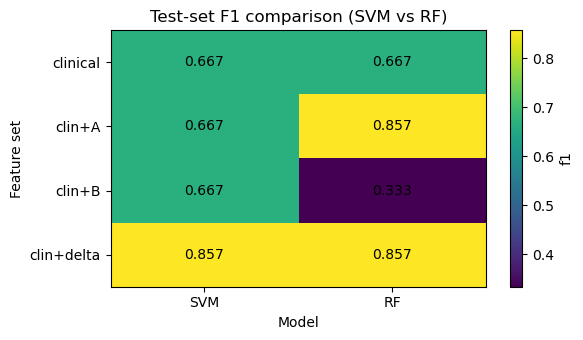

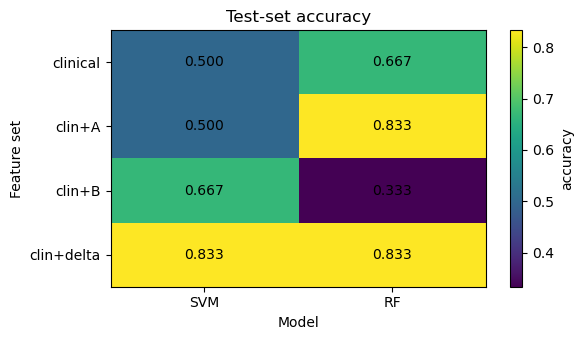

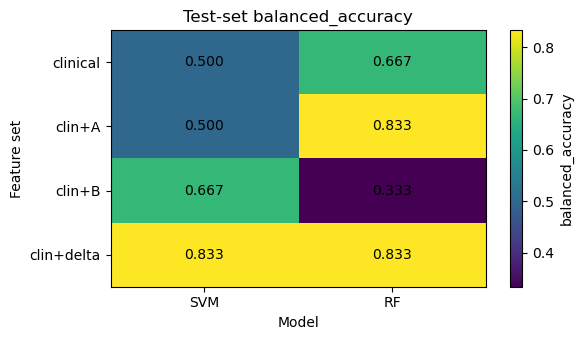

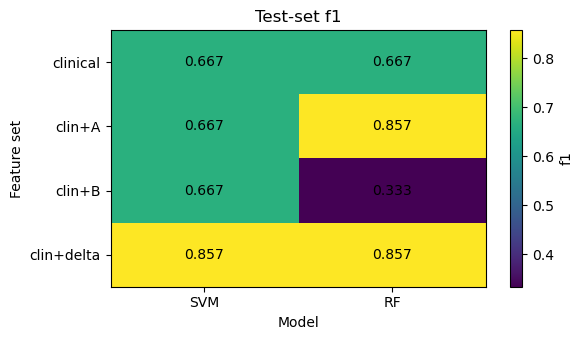

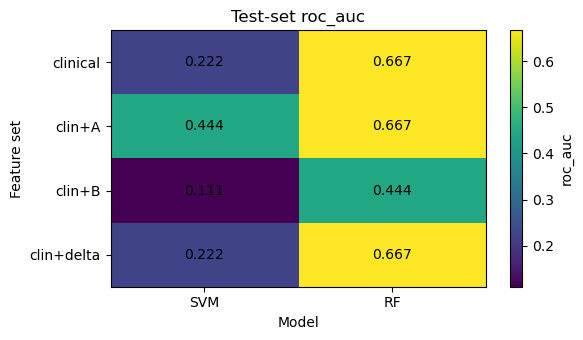

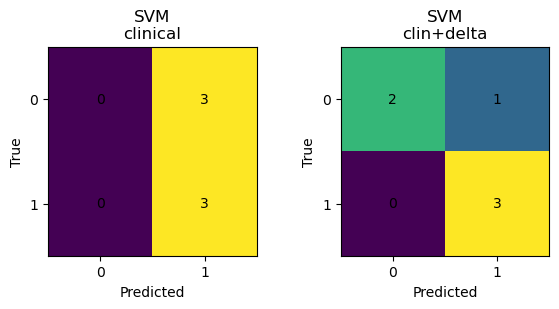

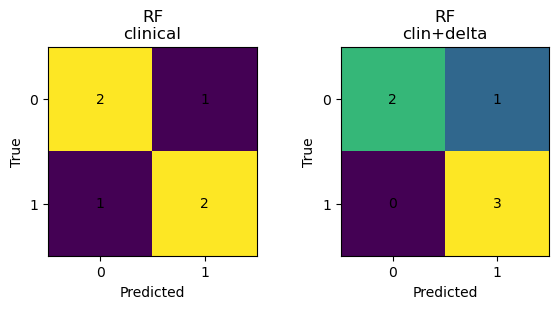

In [ ]:
from plots import (
    plot_metric_heatmap_from_results,
    plot_all_metric_heatmaps,
    plot_confusion_matrices_strip,
)

feature_sets = ["clinical", "clin+A", "clin+B", "clin+delta"]

plot_metric_heatmap_from_results(
    svm_results,
    rf_results,
    metric="f1",
    feature_sets=feature_sets,
    title="Test-set F1 comparison (SVM vs RF)",
)

plot_all_metric_heatmaps(
    svm_results,
    rf_results,
    feature_sets=feature_sets,
)

plot_confusion_matrices_strip(
    svm_results,
    scenarios=["clinical", "clin+delta"],
    model_name="SVM",
)

plot_confusion_matrices_strip(
    rf_results,
    scenarios=["clinical", "clin+delta"],
    model_name="RF",
)


# Plots Interpretation
Across all visual summaries—including confusion matrices and heatmaps of test-set accuracy, balanced accuracy, F1-score, and ROC-AUC—a consistent pattern emerges that highlights both the strengths and the fundamental limitations of the current analysis.

First, the confusion matrix visualizations reveal a stark contrast between classifiers. For the SVM using clinical features alone, the model collapses to a degenerate solution that predicts all patients as the positive class, resulting in zero true negatives and no discriminative ability. This behavior is a clear manifestation of model instability under small-sample, high-dimensional conditions. When delta radiomic features are added, the SVM confusion matrix improves markedly, showing partial class separation (2 true negatives and 3 true positives). However, even in this improved setting, performance remains fragile, as a single misclassified negative case substantially alters all downstream metrics.

In contrast, the Random Forest classifier exhibits more balanced and interpretable confusion matrices across feature sets. The clinical-only Random Forest already achieves symmetric classification errors, while both clin+A and clin+delta configurations reach the same confusion matrix ([[2, 1], [0, 3]]), indicating perfect recall for the positive class and only a single false positive. Importantly, clin+A and clin+delta are indistinguishable at the confusion-matrix level, suggesting that the apparent gains attributed to delta radiomics are not unique and can be matched by simpler feature augmentation.

The heatmaps of test-set F1-score, accuracy, and balanced accuracy reinforce this interpretation. For SVM, clin+delta achieves the highest apparent performance across threshold-based metrics, but this improvement is driven primarily by correcting the degenerate behavior observed with clinical-only features. For Random Forest, both clin+A and clin+delta consistently outperform the clinical-only baseline and the clin+B configuration, but again show identical values, indicating no added benefit of delta features over time-A radiomics alone.

Crucially, the ROC-AUC heatmap provides a more conservative and revealing perspective. While Random Forest achieves relatively stable ROC-AUC values (~0.67) for clinical, clin+A, and clin+delta, the SVM exhibits uniformly low ROC-AUC values across all feature sets (0.11–0.44), including clin+delta. This discrepancy between threshold-dependent metrics (accuracy, F1) and ranking-based performance (ROC-AUC) is characteristic of overfitting and poor probability calibration, especially in extremely small test sets. Notably, delta radiomics does not improve ROC-AUC for either classifier, indicating that it does not enhance global discrimination ability in this setting.

Taken together, these visual results support a coherent conclusion: delta radiomics does not perform worse than clinical-only or single–timepoint radiomics, and in some configurations yields higher apparent test-set accuracy and F1-score. However, these gains are neither unique nor robust, as they are matched by clin+A features and fail to translate into improved ROC-AUC. Given that all metrics are computed on a six-patient test set (three patients per class), where altering the predicted label of a single patient can dramatically change performance estimates, the observed differences are fully compatible with random fluctuations rather than a reliable predictive signal.

Overall, the plots demonstrate that the modeling pipeline functions correctly and that feature augmentation and delta representations are technically viable. Nevertheless, they do not provide convincing evidence that delta radiomics offers superior or stable predictive value in this cohort. Any definitive assessment of the added value of delta radiomics would require more robust evaluation strategies, such as repeated or nested cross-validation on the full dataset and, ideally, validation on larger or independent cohorts.


## References
[1]	D. Mannina et al., “Role of bridging RT in relapsed/refractory diffuse large B-cell lymphoma undergoing CAR-T therapy: a multicenter study,” Nov. 20, 2023, In Review. doi: 10.21203/rs.3.rs-3573162/v1.

[2]	E. Laverdure et al., “Enhancing CAR-T Efficacy in Large B-Cell Lymphoma with Radiation Bridging Therapy: A Real-World Single-Center Experience,” Curr. Oncol., vol. 32, no. 3, p. 173, Mar. 2025, doi: 10.3390/curroncol32030173.

[3]	J. R. Westin et al., “Survival with Axicabtagene Ciloleucel in Large B-Cell Lymphoma,” N. Engl. J. Med., vol. 389, no. 2, pp. 148–157, July 2023, doi: 10.1056/NEJMoa2301665.

[4]	M. Crump et al., “Outcomes in refractory diffuse large B-cell lymphoma: results from the international SCHOLAR-1 study,” Blood, vol. 130, no. 16, pp. 1800–1808, Oct. 2017, doi: 10.1182/blood-2017-03-769620.

[5]	F. L. Locke et al., “Long-term safety and activity of axicabtagene ciloleucel in refractory large B-cell lymphoma (ZUMA-1): a single-arm, multicentre, phase 1–2 trial,” Lancet Oncol., vol. 20, no. 1, pp. 31–42, Jan. 2019, doi: 10.1016/S1470-2045(18)30864-7.

[6]	A. Kuhnl et al., “Outcome and feasibility of radiotherapy bridging in large B‐cell lymphoma patients receiving CD19 CAR T in the UK,” Br. J. Haematol., vol. 205, no. 2, pp. 483–494, Aug. 2024, doi: 10.1111/bjh.19453.

[7]	C. Ladbury et al., “Long-Term Follow-Up of Bridging Therapies Prior to CAR T-Cell Therapy for Relapsed/Refractory Large B Cell Lymphoma,” Cancers, vol. 15, no. 6, p. 1747, Mar. 2023, doi: 10.3390/cancers15061747.

[8]	T. Van Meerten, “Impact of debulking therapy on the clinical outcomes of axicabtagene ciloleucel in the treatment of relapsed or refractory large B-cell lymphoma,” Am. J. Cancer Res., vol. 14, no. 6, pp. 2905–2920, 2024, doi: 10.62347/LLXR8002.

[9]	C. Roddie et al., “Effective bridging therapy can improve CD19 CAR-T outcomes while maintaining safety in patients with large B-cell lymphoma,” Blood Adv., vol. 7, no. 12, pp. 2872–2883, June 2023, doi: 10.1182/bloodadvances.2022009019.

[10]	H. Ababneh, M. Bobić, J. Pursley, and C. Patel, “On Route to Chimeric Antigen Receptor T-cell (CAR T) Therapy, Less Is More: Adaptive Bridging Radiotherapy in Large B-cell Lymphoma,” Cureus, Aug. 2024, doi: 10.7759/cureus.67572.

[11]	Z. Sun and M. Liu, “Systematic review and meta-analysis of the association between bridging therapy and outcomes of chimeric antigen receptor T cell therapy in patients with large B cell lymphoma,” Cytotherapy, vol. 24, no. 9, pp. 940–953, Sept. 2022, doi: 10.1016/j.jcyt.2022.03.009.

[12]	K. Keijzer et al., “Reducing and controlling metabolic active tumor volume prior to CAR T-cell infusion can improve survival outcomes in patients with large B-cell lymphoma,” Blood Cancer J., vol. 14, no. 1, p. 41, Mar. 2024, doi: 10.1038/s41408-024-01022-w.

[13]	M. Ligero et al., “PET‐based radiomics signature can predict durable responses to CAR T‐cell therapy in patients with large B‐cell lymphoma,” eJHaem, vol. 4, no. 4, pp. 1081–1088, Nov. 2023, doi: 10.1002/jha2.757.

[14]	D. Leithner et al., “Conventional and novel [18F]FDG PET/CT features as predictors of CAR-T cell therapy outcome in large B-cell lymphoma,” J. Hematol. Oncol.J Hematol Oncol, vol. 17, no. 1, p. 21, Apr. 2024, doi: 10.1186/s13045-024-01540-x.

[15]	Y. Balagurunathan, J. W. Choi, Z. Thompson, M. Jain, and F. L. Locke, “Radiomic Features Prognosticate Treatment Response in CAR-T Cell Therapy,” Cancers, vol. 17, no. 11, p. 1832, May 2025, doi: 10.3390/cancers17111832.

[16]	J. Fan et al., “Potential synergy between radiotherapy and CAR T-cells - a multicentric analysis of the role of radiotherapy in the combination of CAR T cell therapy,” Radiother. Oncol., vol. 183, p. 109580, June 2023, doi: 10.1016/j.radonc.2023.109580.

[17]	C. Ladbury et al., “Prognostic significance of fludeoxyglucose positron emission tomography delta radiomics following bridging therapy in patients with large B-cell lymphoma undergoing CAR T-cell therapy,” Front. Immunol., vol. 15, p. 1419788, Oct. 2024, doi: 10.3389/fimmu.2024.1419788.